# Capstone2 project: International Student Recruitment Analytics
# Group 4
    - Rishikesh Gaikwad	                    Student ID 0812570
    - Fei Gao	                              Student ID 0822295
    - Ankitkumar Kamleshbhai Padhiar 	      Student ID 0803142
    - Abhigna Reddy Sudini	                 Student ID 0813526
---

# Part6 - Advanced ML model

### Import necessory libraries

In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib.pyplot as plt#visualization
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6

### Read the dataset

In [81]:
st_normal = pd.read_excel('students_selected.xlsx')

In [82]:
st = st_normal.copy() # make a copy
st.head() # data overview

,enrolled,supporting_document_study_permit,offer_state_Pre-Registered,offer_state_Revoked,offer_state_Refund Requested,offer_state_Withdrawn,offer_state_Deferral Requested,offer_state_Paid,offer_state_Accepted,offer_state_Declined,offer_state_Offered,supporting_document_visa_approval_letter,zip_code_encoded,proof_of_payment_provided,age,standardized_score
0,0,0.25,0,1,0,0,0,0,0,0,0,0.0,0.000000,0,0.285714,0.666667
1,1,0.25,1,0,0,0,0,0,0,0,0,0.0,0.077016,0,0.178571,0.666667
2,0,0.00,0,1,0,0,0,0,0,0,0,0.0,0.018051,1,0.250000,0.722222
3,0,0.00,0,1,0,0,0,0,0,0,0,0.0,0.289410,0,0.250000,0.666667
4,1,0.25,1,0,0,0,0,0,0,0,0,0.0,0.017449,1,0.142857,0.722222


---

## Spliting the data

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = st.drop('enrolled', axis=1)  # Input features
y = st['enrolled']  # Target variable

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Chosing a model

### Random Forest Classifier  
Random Forest is a powerful ensemble learning method that is good for handling tabular data.

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42) # using optimized parameters 200,10

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


### Gradient Boosting Classifier  
Gradient Boosting is another ensemble technique that builds one tree at a time and is great for reducing bias and variance.

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


### Support Vector Machine (SVM)  
SVM can be very effective, especially in high dimensional spaces.

In [88]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', probability=True)  # For linearly separable data
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


### Neural Networks  
For neural networks, you might use TensorFlow or PyTorch. Here's a simple example using scikit-learn's MLPClassifier, which is a basic neural network classifier.

In [109]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(179,), #using the optimized parameters 0.001,179,adaptive
                         activation='relu',
                         max_iter=1000, alpha=0.001,
                         solver='adam', verbose=10, random_state=1,
                         learning_rate='adaptive',
                         learning_rate_init=.001)

nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)


Iteration 1, loss = 0.39743535
Iteration 2, loss = 0.23308239
Iteration 3, loss = 0.20869449
Iteration 4, loss = 0.19975464
Iteration 5, loss = 0.19645657
Iteration 6, loss = 0.19391695
Iteration 7, loss = 0.19154835
Iteration 8, loss = 0.18920126
Iteration 9, loss = 0.18718673
Iteration 10, loss = 0.18551946
Iteration 11, loss = 0.18346139
Iteration 12, loss = 0.18169796
Iteration 13, loss = 0.18028519
Iteration 14, loss = 0.17864315
Iteration 15, loss = 0.17732329
Iteration 16, loss = 0.17615814
Iteration 17, loss = 0.17526762
Iteration 18, loss = 0.17456129
Iteration 19, loss = 0.17395819
Iteration 20, loss = 0.17313130
Iteration 21, loss = 0.17278971
Iteration 22, loss = 0.17236951
Iteration 23, loss = 0.17224189
Iteration 24, loss = 0.17174244
Iteration 25, loss = 0.17150003
Iteration 26, loss = 0.17140734
Iteration 27, loss = 0.17074926
Iteration 28, loss = 0.17089973
Iteration 29, loss = 0.17065627
Iteration 30, loss = 0.17014670
Iteration 31, loss = 0.17027375
Iteration 32, los

## Evaluating the Model

### Random Forest

In [90]:
y_pred = rf_model.predict(X_test)  # Class predictions
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


Accuracy: 0.94
Precision: 0.95
Recall: 0.87
F1 Score: 0.90
AUC-ROC: 0.97


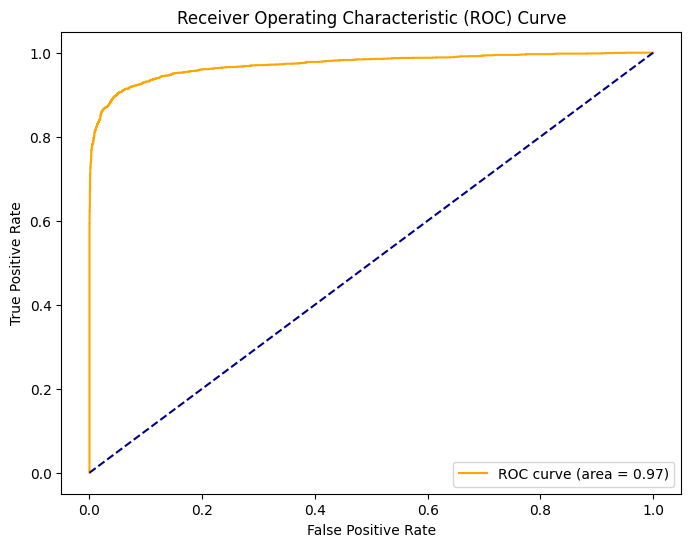

In [92]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### Gradient Boosting

In [93]:
y_pred = gb_model.predict(X_test)  # Class predictions
y_prob = gb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

In [94]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

Accuracy: 0.92
Precision: 0.93
Recall: 0.84
F1 Score: 0.88
AUC-ROC: 0.96


### SVM

In [95]:
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = gb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

In [96]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_roc_svm = roc_auc_score(y_test, y_prob_svm)

In [97]:
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")
print(f"AUC-ROC: {auc_roc_svm:.2f}")

Accuracy: 0.92
Precision: 0.94
Recall: 0.84
F1 Score: 0.89
AUC-ROC: 0.96


### Neural network

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [110]:
# Predictions
y_pred = nn_model.predict(X_test)  # These are the predicted classes

# To calculate AUC-ROC, we need the probabilities of the positive class
y_prob = nn_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class


In [111]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", auc_roc)


Accuracy: 0.935546293539744
Precision: 0.9368663594470046
Recall: 0.8729068269643624
F1 Score: 0.9037563903089575
AUC-ROC: 0.9718433246941078


#### Interpretation

- **Accuracy**: The ratio of correctly predicted observations to the total observations. It's a useful measure when the target classes are balanced.
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It's crucial when the cost of false positives is high.
- **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to the all observations in actual class. It's essential when the cost of false negatives is high.
- **F1 Score**: The weighted average of Precision and Recall. Useful when you seek a balance between Precision and Recall and there's an uneven class distribution.
- **AUC-ROC**: AUC - Area Under the ROC Curve. It tells how much the model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

## 4. Tuning and Optimization
Depending on the initial results, you might want to tune your model to improve its performance. This can involve adjusting hyperparameters, using techniques like grid search or random search, and cross-validation.

### Random Forest

In [101]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'n_estimators': 200}


### Neural Networks

### 1. Identify Hyperparameters to Tune

For a neural network like an `MLPClassifier`, relevant hyperparameters might include:
- `hidden_layer_sizes`: The number of neurons in the hidden layers.
- `activation`: The activation function for the hidden layers, e.g., 'relu', 'tanh'.
- `solver`: The solver for weight optimization, e.g., 'adam', 'sgd', 'lbfgs'.
- `alpha`: L2 penalty (regularization term) parameter.
- `learning_rate`: Learning rate schedule for weight updates.
- `max_iter`: Maximum number of iterations.

### 2. Manual Tuning

You can start by manually adjusting these hyperparameters and observing the effect on performance. This approach gives you a feel for how each hyperparameter affects learning but can be time-consuming.

### 3. Automated Hyperparameter Optimization

For a more systematic approach, use techniques like grid search or random search to explore the hyperparameter space.

#### Grid Search

`GridSearchCV` from scikit-learn systematically explores a grid of hyperparameters, evaluating each combination.

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define a simple neural network model
nn_model_1 = MLPClassifier()

# Define the grid of values to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Setup the grid search
grid_search = GridSearchCV(estimator=nn_model_1, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


#### Random Search

`RandomizedSearchCV` explores random combinations of hyperparameters. This can be more efficient than grid search, especially when dealing with a large hyperparameter space.

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the parameter space to explore
param_dist = {
    'hidden_layer_sizes': sp_randint(50, 200),
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
}

# Setup the random search
random_search = RandomizedSearchCV(nn_model_1, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 179, 'learning_rate': 'adaptive', 'solver': 'adam'}


### 4. Cross-Validation

Regardless of the optimization technique, use cross-validation to ensure that your model generalizes well to unseen data. This can be built into both grid search and random search via the `cv` parameter.

### 5. Evaluation and Iteration

After finding the best hyperparameters, evaluate your optimized model on the test set to ensure it performs as expected. Hyperparameter tuning is an iterative process; you may need to adjust your strategy based on the results.

### Conclusion

Tuning a neural network is both an art and a science, requiring experimentation and patience. Automated methods like grid search and random search can save time and help discover effective hyperparameter combinations. Always validate the results using cross-validation or a separate test set to ensure the model's performance generalizes well.

## Plotting ROC Curve

#### Step 1: Import Necessary Libraries

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

#### Step 2: Model Predictions

For each model, after training it with your training data, you'll use the test data to generate predictions. For AUC-ROC, you'll need the probability scores for the positive class.

In [105]:
# For models like RandomForest, Gradient Boosting, and Neural Network
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # For AUC-ROC, assuming rf_model is your trained model

# Repeat for Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# For SVM, which doesn't naturally output probabilities, you'll just get predictions
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# For Neural Network (assuming it's a classifier like MLPClassifier)
y_pred_nn = nn_model.predict(X_test)
y_prob_nn = nn_model.predict_proba(X_test)[:, 1]


#### Step 3: Evaluate Metrics

Now, calculate each metric using the true labels `y_test` and your predictions. For models without probability outputs (like some SVM configurations), you'll skip AUC-ROC.

In [106]:
# Assume `y_test` is your true labels
# For accuracy, precision, recall, and F1 score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# For AUC-ROC
auc_roc_rf = roc_auc_score(y_test, y_prob_rf)

# Repeat the process for Gradient Boosting (gb) and Neural Network (nn)
auc_roc_gb = roc_auc_score(y_test, y_prob_gb)
auc_roc_svm = roc_auc_score(y_test, y_prob_svm)
auc_roc_nn = roc_auc_score(y_test, y_prob_nn)

#### Step 4: Plotting ROC Curve

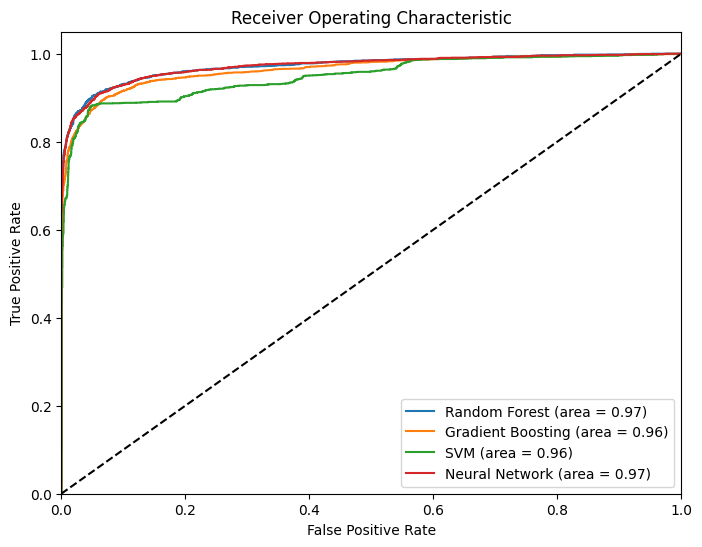

In [107]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % auc_roc_rf)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (area = %0.2f)' % auc_roc_gb)
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % auc_roc_gb)
plt.plot(fpr_nn, tpr_nn, label='Neural Network (area = %0.2f)' % auc_roc_nn)

plt.plot([0, 1], [0, 1], 'k--')  # Random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## charts showing the performance and comparison of different models

For the sake of illustration, let's assume we have the following performance metrics from evaluating Random Forest, Gradient Boosting, SVM, and Neural Network models on the test set:

| Model             | Accuracy | AUC-ROC |
|-------------------|----------|---------|
| Random Forest     | 0.94     | 0.97    |
| Gradient Boosting | 0.92     | 0.96    |
| SVM               | 0.92     | 0.96    |
| Neural Network    | 0.93     | 0.97    |

- A bar chart comparing the accuracy of different models.
- A bar chart comparing the AUC-ROC scores of different models.

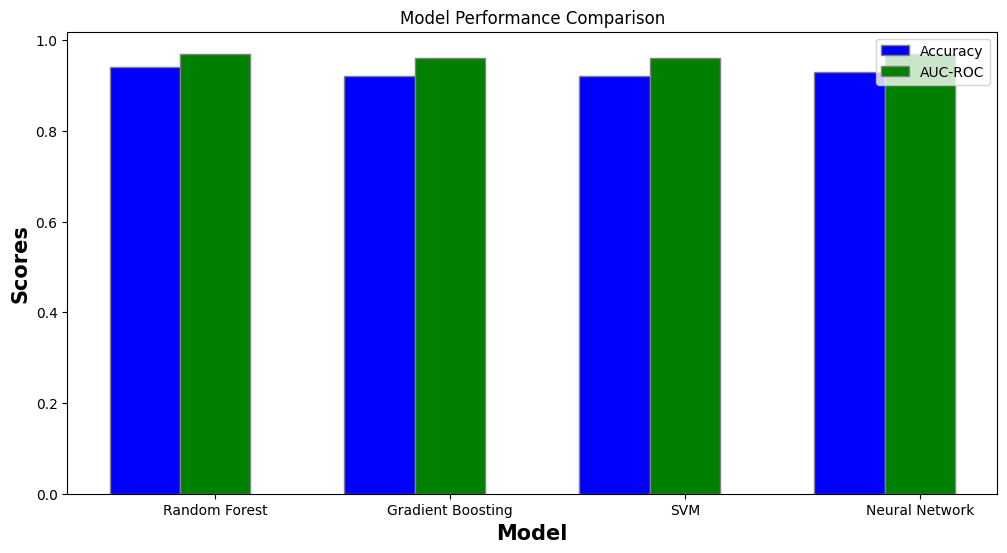

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network']

# Performance metrics
accuracy_scores = [0.94, 0.92, 0.92, 0.93]
auc_roc_scores = [0.97, 0.96, 0.96, 0.97]

# Setting up the bar width
barWidth = 0.3

# Set position of bar on X axis
r1 = np.arange(len(accuracy_scores))
r2 = [x + barWidth for x in r1]

# Create the plots
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.bar(r1, accuracy_scores, color='b', width=barWidth, edgecolor='grey', label='Accuracy')

# Plotting AUC-ROC
plt.bar(r2, auc_roc_scores, color='g', width=barWidth, edgecolor='grey', label='AUC-ROC')

# Adding the aesthetics
plt.xlabel('Model', fontweight='bold', fontsize=15)
plt.ylabel('Scores', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(accuracy_scores))], models)

# Add legend
plt.legend()

# Show the plot
plt.title('Model Performance Comparison')
plt.show()
